In [2]:
pip install tensorflow --user

Looking in indexes: http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple, http://pypi.servicos.bb.com.br/simple
     |████████████████████████████████| 86.3MB 66.8MB/s 
     |████████████████████████████████| 2.2MB 48.7MB/s 
     |████████████████████████████████| 112kB 52.2MB/s 
     |████████████████████████████████| 61kB 34.7MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
     |████████████████████████████████| 71kB 49.0MB/s 
     |████████████████████████████████| 3.8MB 49.8MB/s 
     |████████████████████████████████| 92kB 55.6MB/s 
     |████████████████████████████████| 327kB 48.0MB/s 
     |████████████████████████████████| 81kB 55.7MB/s 
     |████████████████████████████████| 133kB 56.0MB/s 
     |████████████████████████████████| 81kB 56.1MB/s 
ERROR: tensorboard 2.0.1 has requirement setuptools>=41.0.0, but you'll have setuptools 39.2.0 which is incompatible.
  Running setup.py install for wrapt ... done
  Running setup.py install for gast

In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def predict(img_path, showImage=False):
    
    image_w, image_h = 48, 48
    
    # parameters for loading data and images
    detection_model_path = 'haarcascade/haarcascade_frontalface_default.xml'
    model = load_model('best_model.hdf5', compile=False)
    
    #0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
    
    EMOTIONS = {0: "neutra" , 1: "feliz", 2: "triste", 3: "surpresa", 4: "bravo"}
    TRANSLATE = {0: 4, 1: 1, 2: 2, 3: 3, 4: 0}
    
    # hyper-parameters for bounding boxes shape
    # loading models
    face_detection = cv2.CascadeClassifier(detection_model_path)
     
    #reading the frame
    orig_frame = cv2.imread(img_path)
    frame = cv2.imread(img_path,0)
    faces = face_detection.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
        roi = frame[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (image_w, image_h))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        preds = model.predict(roi)[0]
        sentiment = EMOTIONS[TRANSLATE[preds.argmax()]]
        if showImage:
            cv2.putText(orig_frame, sentiment, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
            cv2.rectangle(orig_frame, (fX, fY), (fX + fW, fY + fH),(255, 0, 0), 2)
            plt.imshow(orig_frame)
    
    return TRANSLATE[preds.argmax()]

In [12]:
def main():
    image = 'index.jpeg'
    #image = sys.argv[1]
    print(predict(image, True))

1


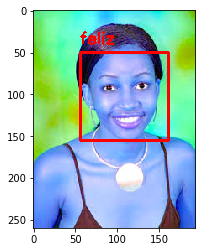

In [13]:
if __name__ == '__main__':
    main()